## **Домашняя работа №4.**
## ** Дмитрий Головинов BAE26 **

Максимальная оценка - 10 баллов.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

В данной домашней работе требуется реализовать разбиение элементов выборки в вершине дерева.

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Iterable, List, Tuple

from sklearn.model_selection import train_test_split

In [2]:
# `load_boston` has been removed from scikit-learn since version 1.2.

#from sklearn.datasets import load_boston
#boston = load_boston()

In [3]:
# !wget -i https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
#data_git = pd.read_csv('boston_house_prices.csv', sep="\s+")

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.



In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = pd.DataFrame(data, columns=feature_names, index=range(len(data)))
y = pd.DataFrame(target, columns=['MEDV'], index=range(len(target)))

X['target'] = y

In [6]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)

**Задание 1 (2 балла)**: реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины.

In [8]:
def H(R: np.array) -> float:
    # Расчёт критерия информативности для заданного набора объектов R
    y_vals = R[:, -1]
    mean_y = np.mean(y_vals)
    return np.mean((y_vals - mean_y) ** 2)

def split_node(R_m: np.array, feature_name: str, threshold: float) -> Tuple[np.array, np.array]:
    # Разбиение множества объектов R_m на два подмножества по заданному признаку и порогу
    feature_idx = X.columns.get_loc(feature_name)
    left = R_m[R_m[:, feature_idx] <= threshold]
    right = R_m[R_m[:, feature_idx] > threshold]
    return left, right

def q_error(R_m: np.array, feature_name: str, threshold: float) -> float:
    # Расчет критерия ошибки для разбиения
    left, right = split_node(R_m, feature_name, threshold)
    return (len(left) / len(R_m)) * H(left) + (len(right) / len(R_m)) * H(right)

**Задание 2 (2 балла)**: переберите все возможные разбиения обучающей выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


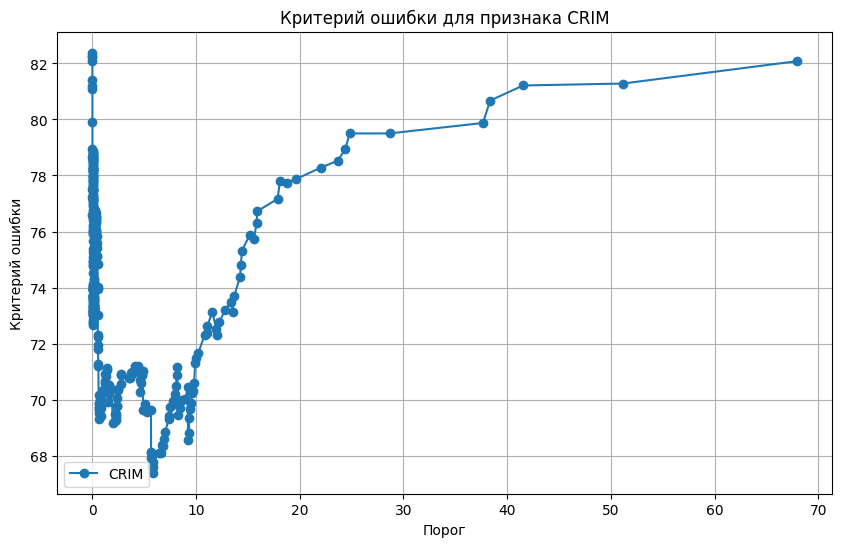

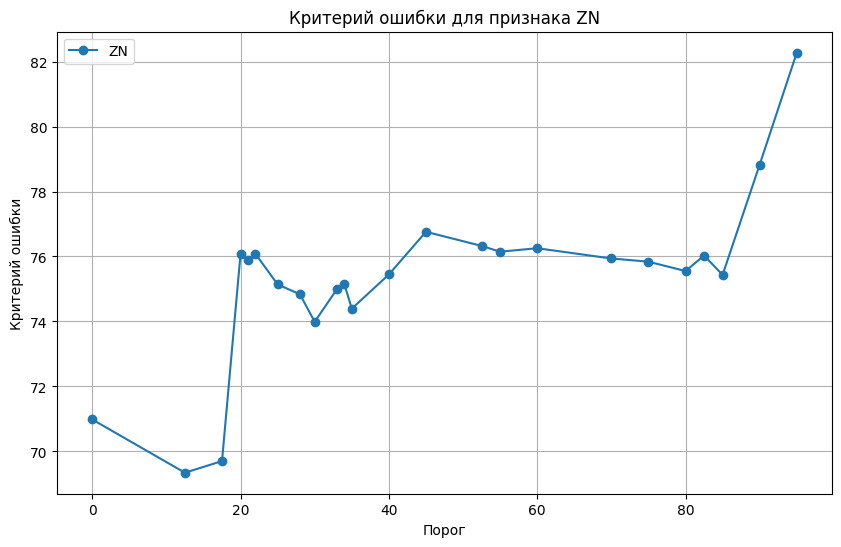

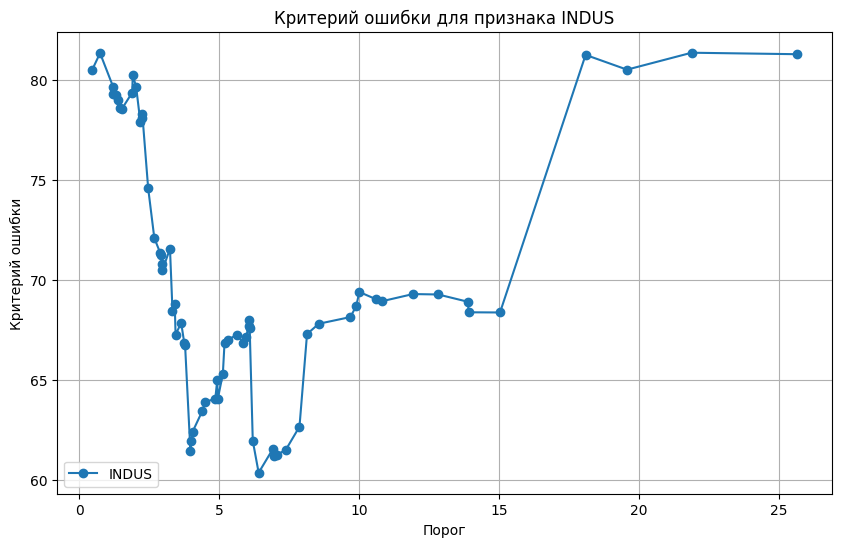

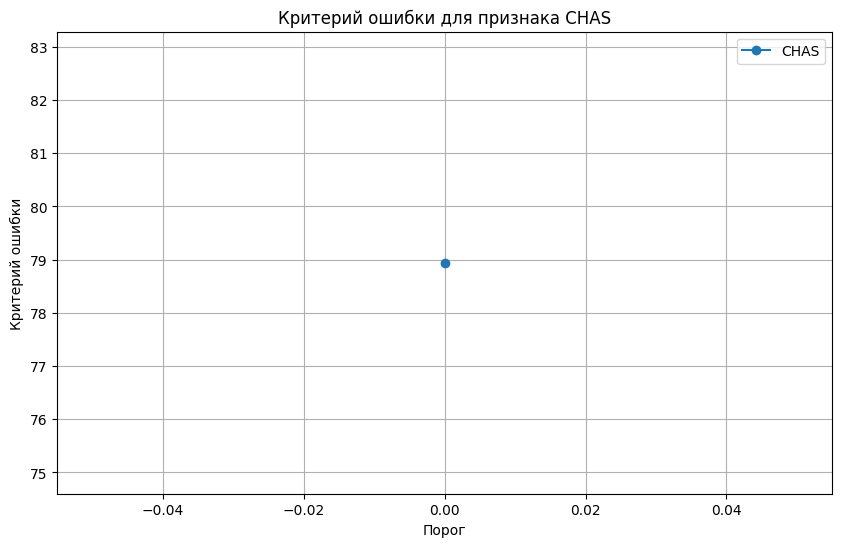

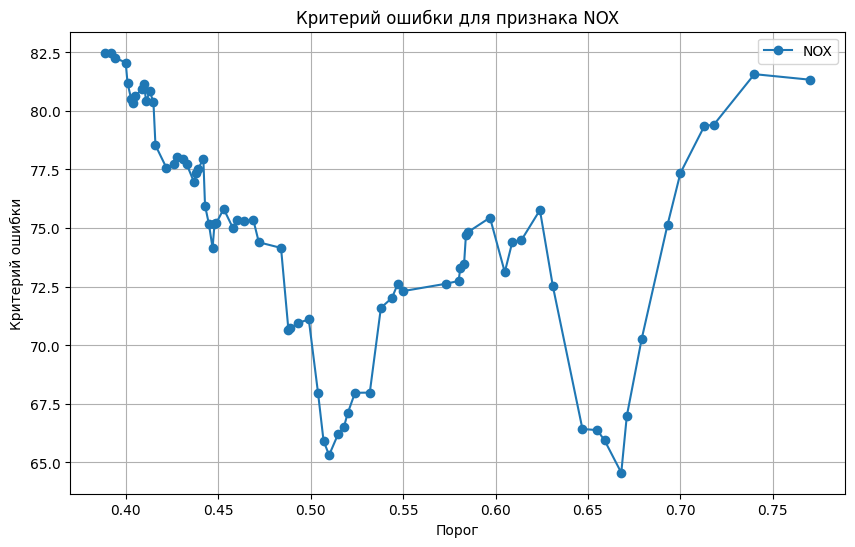

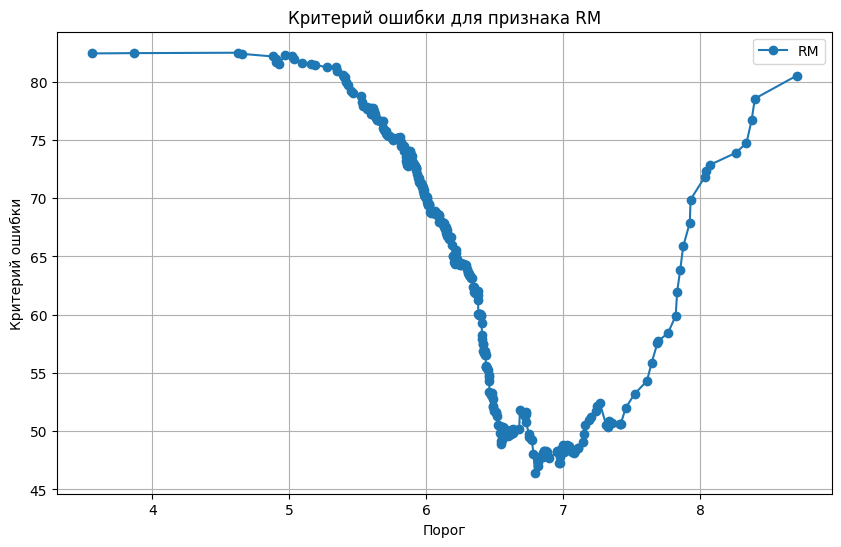

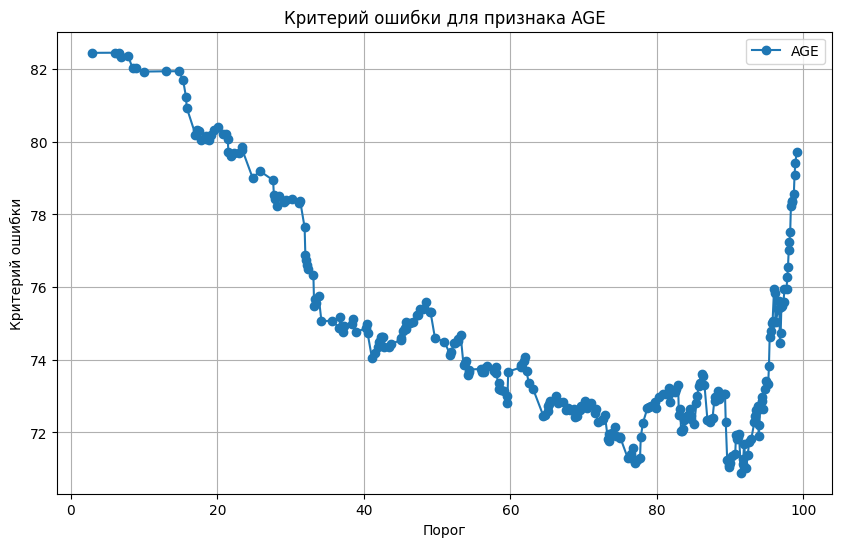

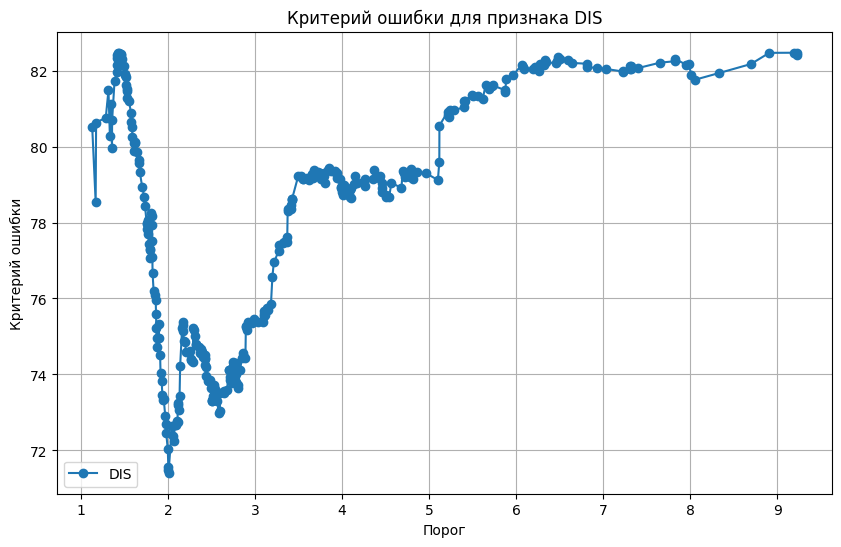

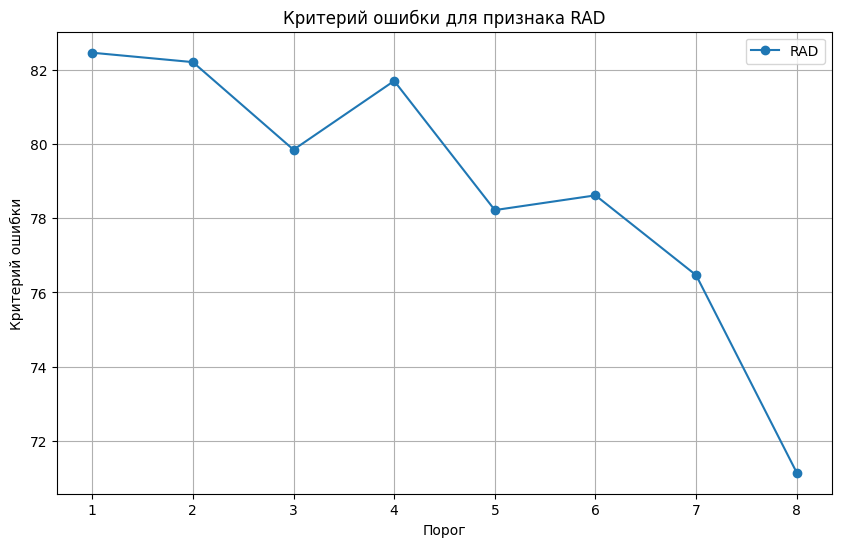

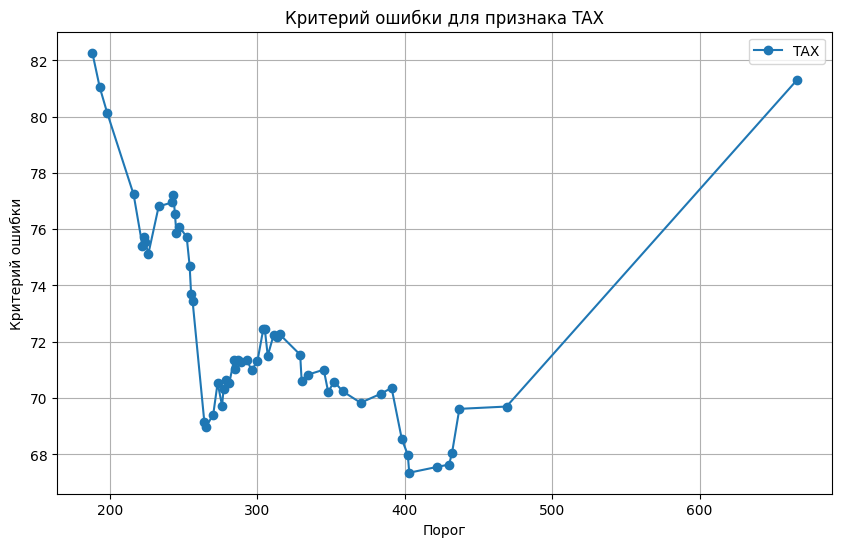

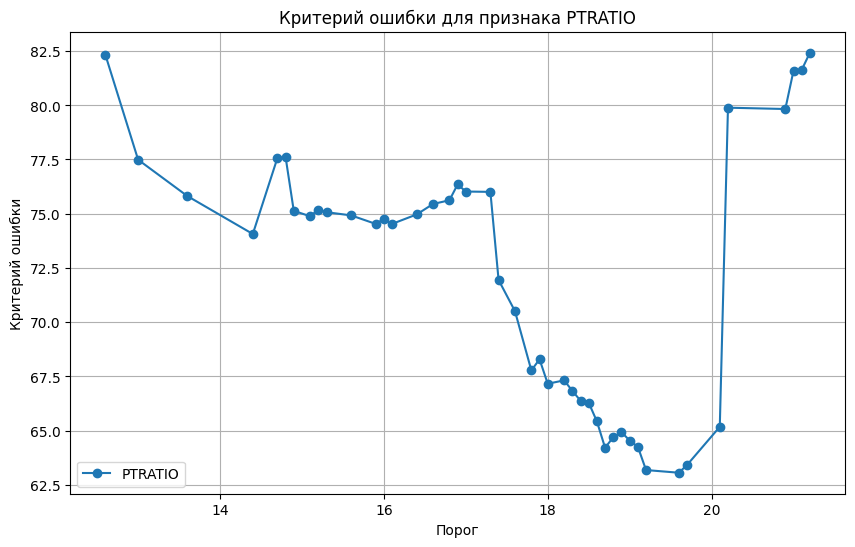

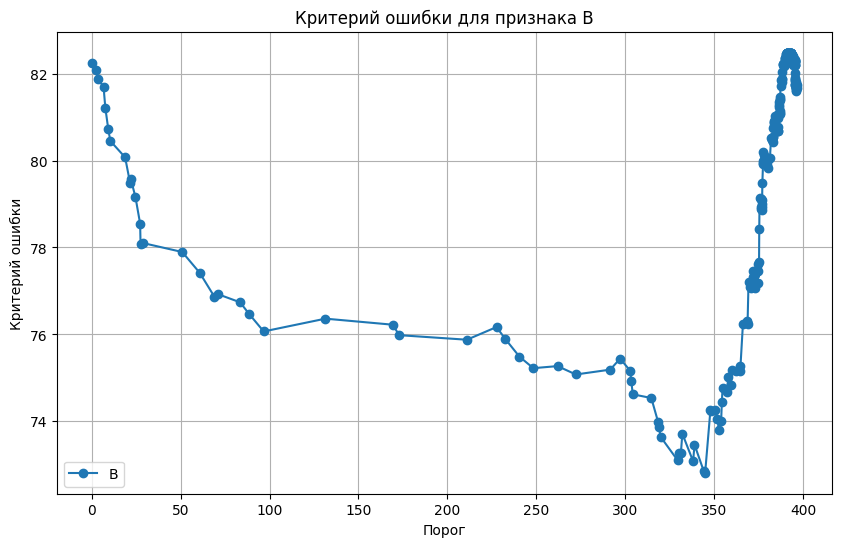

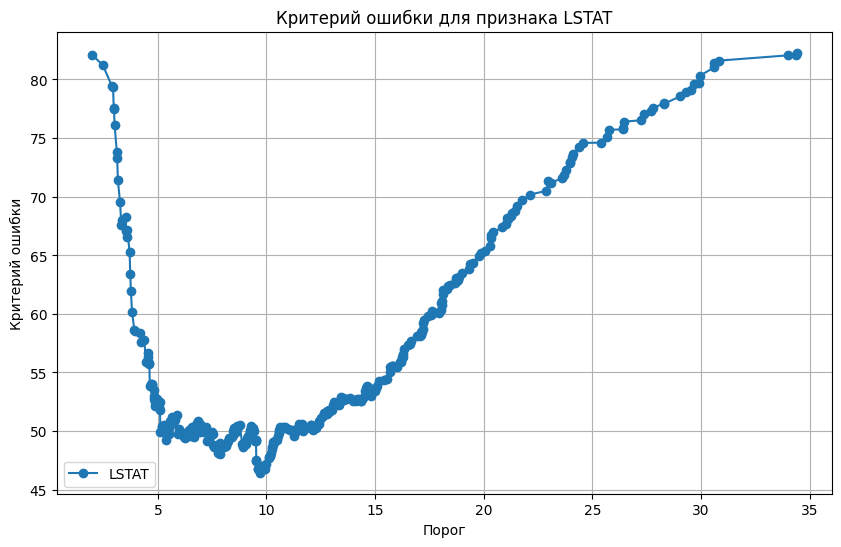

In [9]:
def plots_task2(X_train: pd.DataFrame, feature: str):
    # Построение графика критерия ошибки для всех возможных порогов по заданному признаку.
    thresholds = np.unique(X_train[feature])
    errors = [q_error(X_train.values, feature, t) for t in thresholds]

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, errors, '-o', label=feature)
    plt.title(f"Критерий ошибки для признака {feature}")
    plt.xlabel("Порог")
    plt.ylabel("Критерий ошибки")
    plt.legend()
    plt.grid(True)
    plt.show()

# Построение графиков критерия ошибки для каждого признака
for feature in feature_names:
    plots_task2(X_train, feature)


**Задание 3  (2 балла)**: Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку.

In [10]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, float]:
    """
    Находит оптимальное разбиение для заданного признака.

    Возвращает:
    - оптимальный порог
    - значение критерия ошибки для этого порога
    """
    feature_idx = list(X.columns).index(feature)
    unique_values = np.unique(R_m[:, feature_idx])

    # Если у нас есть только одно уникальное значение (это я прикрутил для CHAS), разбиение невозможно
    if len(unique_values) == 1:
        return unique_values[0], float('inf')

    thresholds = (unique_values[:-1] + unique_values[1:]) / 2
    errors = [q_error(R_m, feature, t) for t in thresholds]

    optimal_idx = np.argmin(errors)
    return thresholds[optimal_idx], errors[optimal_idx]


**Задание 4  (2 балла)**: Для первого разбиения найдите признак, показывающий наилучшее качество. Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога.

Лучший признак для разбиения: RM
Оптимальный порог для разбиения: 6.8030
Значение критерия ошибки на оптимальном разбиении: 46.4261


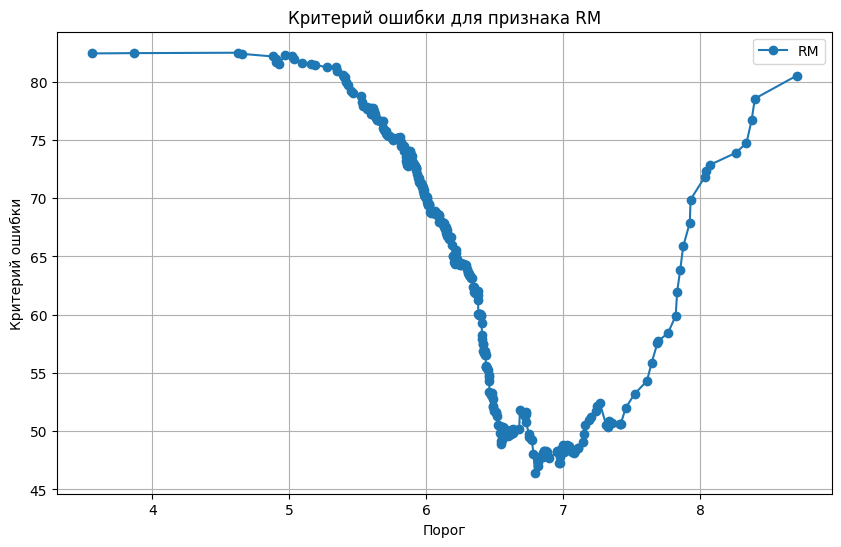

In [11]:
# Для каждого признака вычисляем ошибку на оптимальном разбиении
features_errors = {feature: get_optimal_split(X_train.values, feature) for feature in feature_names}

# Находим признак с наименьшей ошибкой
best_feature = min(features_errors, key=lambda k: features_errors[k][1])
optimal_threshold, error = features_errors[best_feature]

print(f"Лучший признак для разбиения: {best_feature}")
print(f"Оптимальный порог для разбиения: {optimal_threshold:.4f}")
print(f"Значение критерия ошибки на оптимальном разбиении: {error:.4f}")

# Построим график критерия ошибки для лучшего признака
plots_task2(X_train, best_feature)

 **Задание 5 (2 балла)**: Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения входного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения.

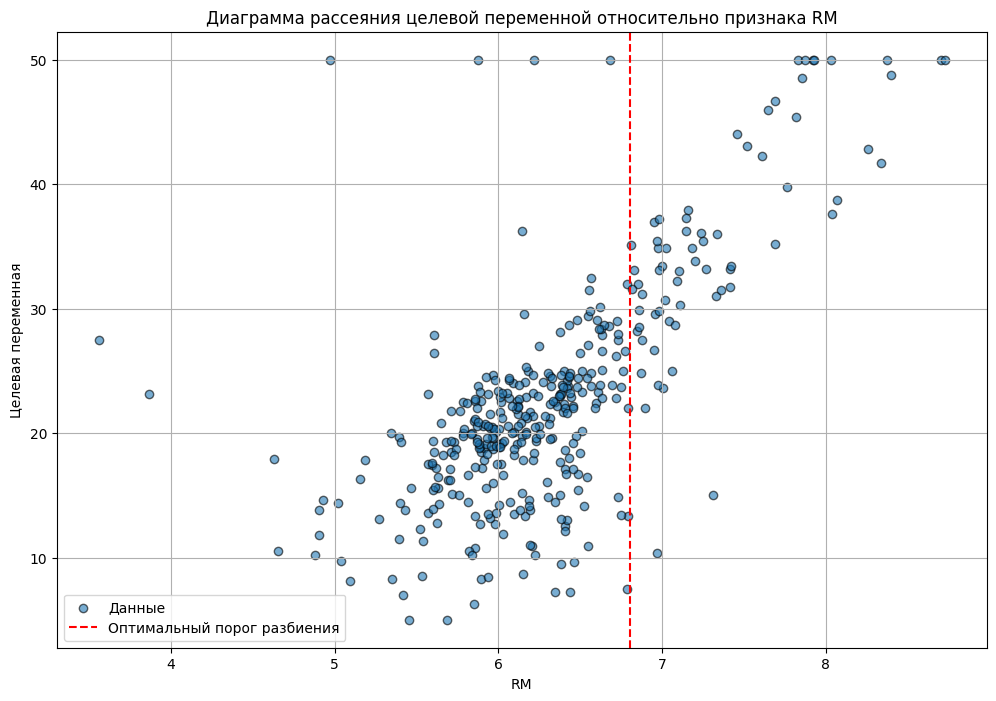

In [12]:
plt.figure(figsize=(12, 8))

# Построение диаграммы рассеяния
plt.scatter(X_train[best_feature], X_train['target'], edgecolor='k', alpha=0.6, label="Данные")
plt.axvline(optimal_threshold, color='red', linestyle='--', label="Оптимальный порог разбиения")

plt.title(f"Диаграмма рассеяния целевой переменной относительно признака {best_feature}")
plt.xlabel(best_feature)
plt.ylabel("Целевая переменная")
plt.legend()
plt.grid(True)
plt.show()